In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.dates as mdates
from datetime import timedelta

In [17]:
df = pd.read_excel('kairos_plataform.xlsx')

df['FECHA'] = pd.to_datetime(df['FECHA'])

df['HORA'] = pd.to_timedelta(df['HORA'].astype(str))

df['Timestamp'] = df['FECHA'] + df['HORA']

df.index = df['Timestamp']

df.drop(['FECHA','HORA','TURNO'],axis=1, inplace=True)



In [20]:
df_a2 = df[(df['AREA'] == 'A2') | (df['PROCESO'] == 'Molienda A2' )]

In [21]:
df_a2

,AREA,PROCESO,% SOLIDOS,MALLA 65#,COMENTARIOS,USUARIO,Timestamp
Timestamp,,,,,,,
2023-01-01 01:56:00,A2,-,45.0,32,NaN,Glenn Guajardo Lara,2023-01-01 01:56:00
2023-01-01 05:46:00,A2,-,40.0,29,NaN,Glenn Guajardo Lara,2023-01-01 05:46:00
2023-01-01 08:07:00,A2,-,39.0,30,08:07 hrs.,Francisco Alderete,2023-01-01 08:07:00
2023-01-01 13:25:00,A2,-,40.0,27,13:25 hrs.,Francisco Alderete,2023-01-01 13:25:00
2023-01-01 17:58:00,A2,-,40.0,32,17:58 hrs.,Francisco Alderete,2023-01-01 17:58:00
...,...,...,...,...,...,...,...
2023-11-08 05:28:00,NaN,Molienda A2,44.0,31,NaN,Glenn Guajardo Lara,2023-11-08 05:28:00
2023-11-08 07:58:00,NaN,Molienda A2,40.0,30,NaN,José Ledesma Espinoza,2023-11-08 07:58:00
2023-11-08 10:12:00,NaN,Molienda A2,42.0,34,NaN,José Ledesma Espinoza,2023-11-08 10:12:00


In [23]:
df_a2['delta horas'] = round(df_a2.index.to_series().diff().fillna(pd.Timedelta(0)).apply(lambda x: x.total_seconds() / 3600), 2)
df_a2['mes'] = df_a2.index.month

D:\Users\jsegu014\AppData\Local\Temp\ipykernel_2260\3462739378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a2['delta horas'] = round(df_a2.index.to_series().diff().fillna(pd.Timedelta(0)).apply(lambda x: x.total_seconds() / 3600), 2)
D:\Users\jsegu014\AppData\Local\Temp\ipykernel_2260\3462739378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a2['mes'] = df_a2.index.month


(0.0, 5.0)

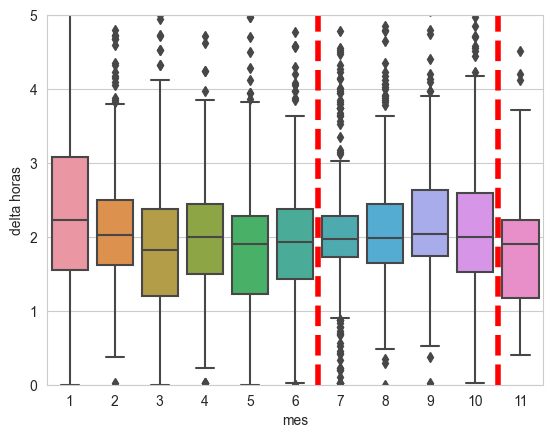

In [39]:
sns.boxplot(y=df_a2['delta horas'], x = df_a2['mes'])
plt.axvline(5.5, ls='--', color='r', lw=4)
plt.axvline(9.5, ls='--', color='r', lw=4)
plt.ylim(0,5)

In [40]:
#el comportamiento es similar

(0.0, 5.0)

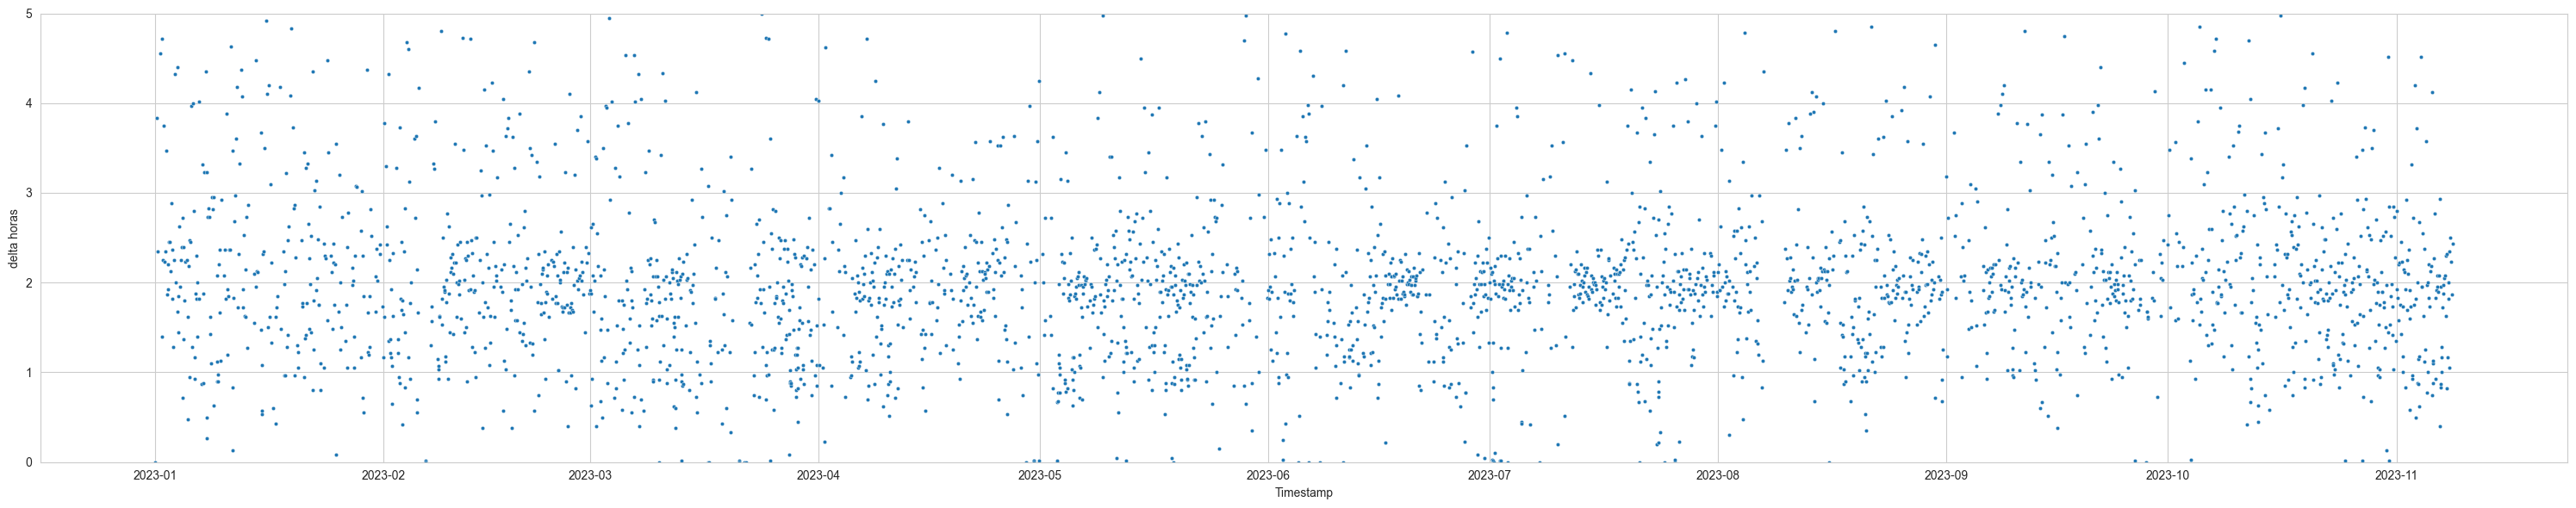

In [47]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(30,6),tight_layout=True)
gs = gridspec.GridSpec(1, 1, width_ratios=[1], height_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])

sns.scatterplot(y=df_a2['delta horas'], x = df_a2.index, s=10)
#plt.axvline(5.5, ls='--', color='r', lw=4)
#plt.axvline(9.5, ls='--', color='r', lw=4)
plt.ylim(0,5)

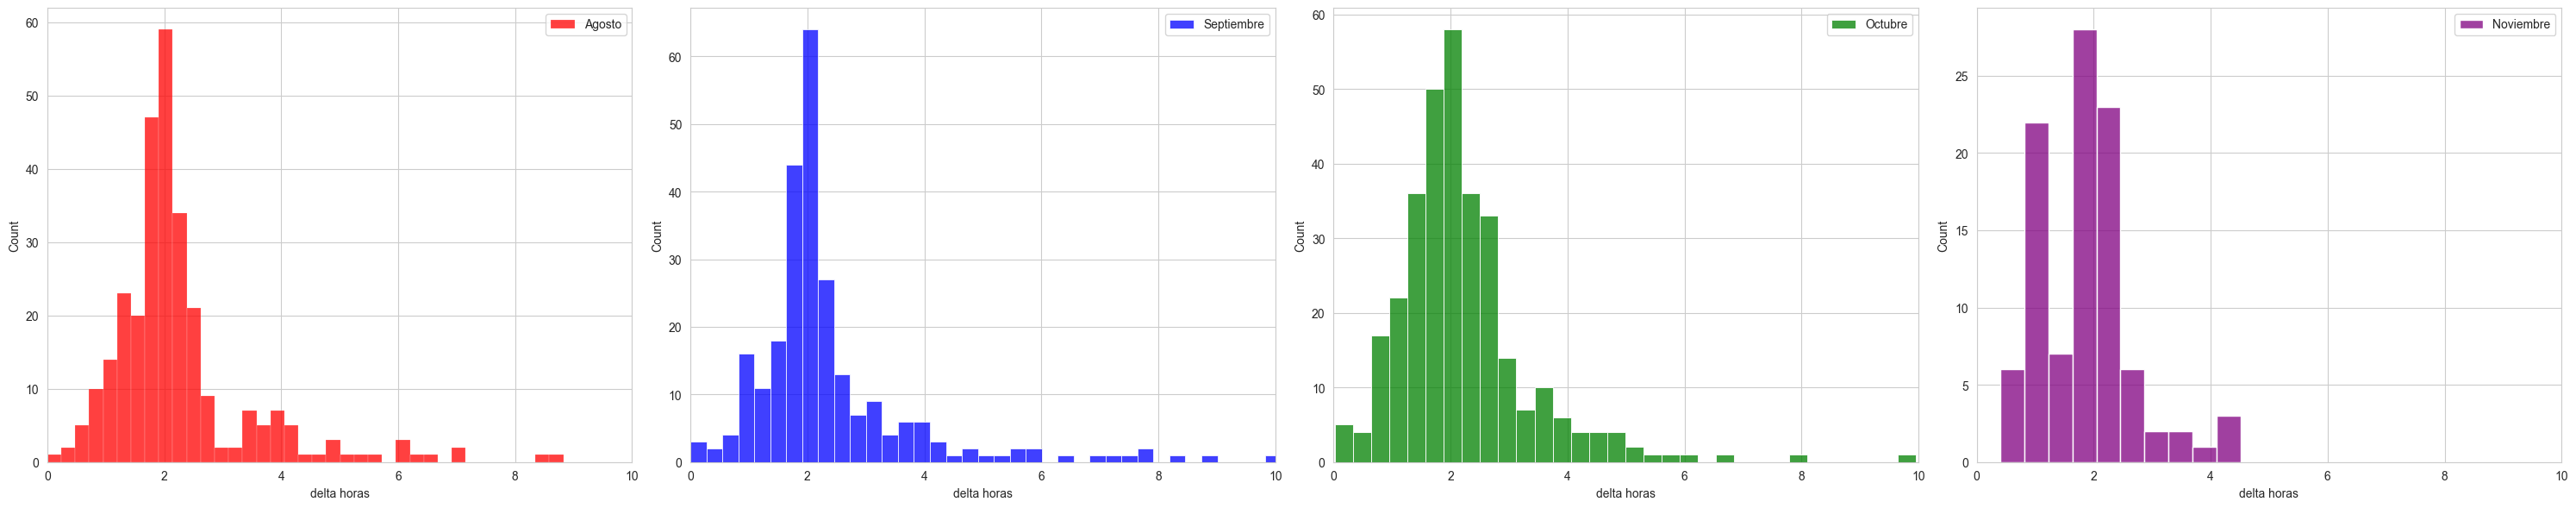

In [68]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(30,6),tight_layout=True)
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], height_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])

sns.histplot(x=df_a2.loc['2023-08','delta horas'], ax=ax0, color = 'red', label = 'Agosto')
sns.histplot(x=df_a2.loc['2023-09','delta horas'], ax=ax1, color = 'b', label = 'Septiembre')
sns.histplot(x=df_a2.loc['2023-10','delta horas'], ax=ax2, color= 'g', label = 'Octubre')
sns.histplot(x=df_a2.loc['2023-11','delta horas'], ax=ax3, color = 'purple', label = 'Noviembre')

ax0.set_xlim(0,10)
ax1.set_xlim(0,10)
ax2.set_xlim(0,10)
ax3.set_xlim(0,10)

ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()




(0.0, 50.0)

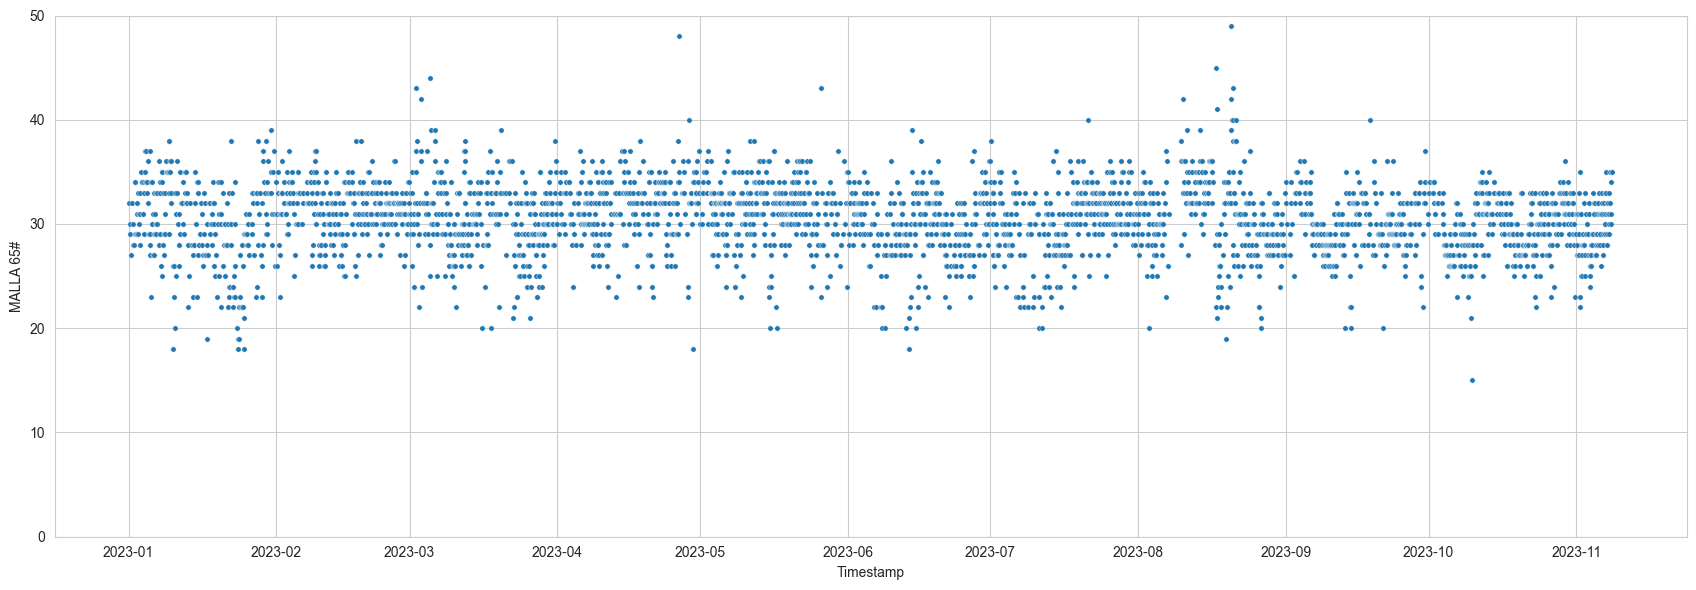

In [35]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(50,6),tight_layout=True)
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[1])
ax0 = fig.add_subplot(gs[0, 0])


sns.scatterplot(y=df_a2['MALLA 65#'] , x= df_a2.index,ax=ax0, s =15)
ax0.set_ylim(0,50)